Pymaceuticals Observed Trends:
    - Capomulin was legitimately successful at treating the tumors in this population of mice.  It was the only treatment of those analyzed to actually reduce the total tumor volume over the course of treatment.  Additionally, survival rate was significantly higher compared to the other treatments.  It should be noted that metastatic sites still increased over time, but at a slower rate than the other treatments.
        
    - Some of the other treatments were arguably less effective than no treatment (Placebo).  Ketapril, in particular, was less effective at treating tumor volume than the placebo medication.  The growth of metastatic sites for placebo treated mice and ketapril treated mice were virtually identical given how their errors overlapped, leading me to believe that Ketapril is not effective.
        
    
    - Infubinol showed mixed results.  On the one hand, it had a similar trend of treating the tumor volume to Ketapril and the placebo (though it did slightly better) and it was the deadliest drug with the lowest  survival rate.  On the other hand, it led to fewer metastatic sites than both ketapril and placebo.  Infubinol, was potentially more effective than the placebo and warrants some further investigation.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
csv_path = 'data/mouse_drug_data.csv'
mouse_df = pd.read_csv(csv_path)
csv_path1 = 'data/clinicaltrial_data.csv'
ct_df = pd.read_csv(csv_path1)
mouse_df.head()
ct_df.head()
# Combine the data into a single dataset
merged_data = pd.merge(ct_df, mouse_df, on="Mouse ID", how="inner")

# Display the data table for preview
merged_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_df = merged_data.loc[:,["Timepoint", "Drug", "Tumor Volume (mm3)"]]

# Convert to DataFrame
means = tumor_df.groupby(["Drug", "Timepoint"]).mean()

# Preview DataFrame
means.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
st_er = tumor_df.groupby(["Drug", "Timepoint"]).sem()
# Convert to DataFrame

# Preview DataFrame
st_er.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


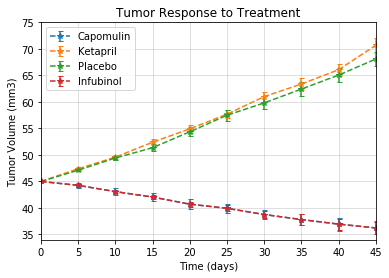

In [4]:
# Generate the Plot (with Error Bars)
plt.errorbar(np.arange(0, 50, 5), means.loc["Capomulin", "Tumor Volume (mm3)"], 
            yerr = st_er.loc["Capomulin", "Tumor Volume (mm3)"], fmt = '*--', capsize = 2.5, label = "Capomulin")
plt.errorbar(np.arange(0, 50, 5), means.loc["Ketapril", "Tumor Volume (mm3)"], 
            yerr = st_er.loc["Ketapril", "Tumor Volume (mm3)"], fmt = '*--', capsize = 2.5, label = "Ketapril")
plt.errorbar(np.arange(0, 50, 5), means.loc["Placebo", "Tumor Volume (mm3)"], 
            yerr = st_er.loc["Placebo", "Tumor Volume (mm3)"], fmt = '*--', capsize = 2.5, label = "Placebo")
plt.errorbar(np.arange(0, 50, 5), means.loc["Capomulin", "Tumor Volume (mm3)"], 
            yerr = st_er.loc["Infubinol", "Tumor Volume (mm3)"], fmt = '*--', capsize = 2.5, label = "Infubinol")

# #Add Legend
plt.legend(loc="best")

#Add gridlines
plt.grid(alpha = 0.5)

#Add Labels
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume (mm3)')

#Add x & y Limits
plt.xlim(0,45)
plt.ylim(34,75)

plt.show()
# Save the Figure



In [5]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
subset_df = merged_data.loc[:,["Timepoint", "Drug", "Metastatic Sites"]]
# Convert to DataFrame
means = subset_df.groupby(["Drug", "Timepoint"]).mean()
# Preview DataFrame
means.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
st_er = subset_df.groupby(["Drug", "Timepoint"]).sem()
# Convert to DataFrame

# Preview DataFrame
st_er.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


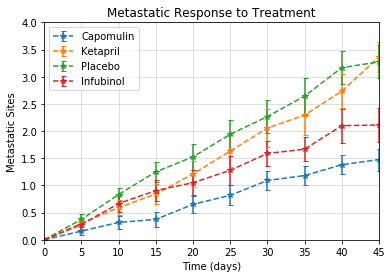

In [10]:
# Generate the Plot (with Error Bars)
plt.errorbar(np.arange(0, 50, 5), means.loc["Capomulin", "Metastatic Sites"], 
             yerr = st_er.loc["Capomulin", "Metastatic Sites"], fmt = '*--', capsize = 2.5, label = "Capomulin")
plt.errorbar(np.arange(0, 50, 5), means.loc["Ketapril", "Metastatic Sites"], 
             yerr = st_er.loc["Ketapril", "Metastatic Sites"], fmt = '*--', capsize = 2.5, label = "Ketapril")
plt.errorbar(np.arange(0, 50, 5), means.loc["Placebo", "Metastatic Sites"], 
             yerr = st_er.loc["Placebo", "Metastatic Sites"], fmt = '*--', capsize = 2.5, label = "Placebo")
plt.errorbar(np.arange(0, 50, 5), means.loc["Infubinol", "Metastatic Sites"], 
             yerr = st_er.loc["Infubinol", "Metastatic Sites"], fmt = '*--', capsize = 2.5, label = "Infubinol")
#Add Legend
plt.legend(loc="best")
#Add Gridlines
plt.grid(alpha=0.5)
#Add Labels
plt.title('Metastatic Response to Treatment')
plt.xlabel('Time (days)')
plt.ylabel('Metastatic Sites')

#Add x & y limits
plt.xlim(0,45)
plt.ylim(0,4)
# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
grouped_df = merged_data.groupby(["Drug", "Timepoint"])
# Convert to DataFrame
subset_df = grouped_df[["Mouse ID"]].count().rename(columns={"Mouse ID": "Mouse Count"})
# Preview DataFrame
subset_df.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


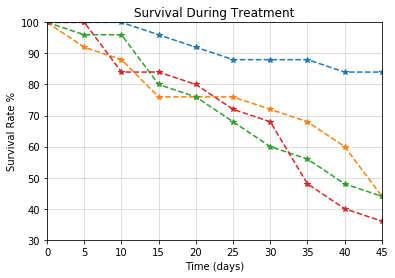

In [15]:
# Generate the Plot (Accounting for percentages)
plt.plot(np.arange(0, 50, 5), 100*subset_df.loc["Capomulin", "Mouse Count"]/25, marker = '*', label = "Capomulin", linestyle = '--')
plt.plot(np.arange(0, 50, 5), 100*subset_df.loc["Ketapril", "Mouse Count"]/25, marker = '*', label = "Ketapril", linestyle = '--')
plt.plot(np.arange(0, 50, 5), 100*subset_df.loc["Placebo", "Mouse Count"]/25, marker = '*', label = "Placebo", linestyle = '--')
plt.plot(np.arange(0, 50, 5), 100*subset_df.loc["Infubinol", "Mouse Count"]/25, marker = '*', label = "Infubinol", linestyle = '--')

plt.grid(alpha=0.5)

plt.title('Survival During Treatment')
plt.xlabel('Time (days)')
plt.ylabel('Survival Rate %')
plt.xlim(0,45)
plt.ylim(30,100)
# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug
initial_volumes = merged_data.loc[(merged_data["Timepoint"] ==0), ["Drug", "Tumor Volume (mm3)"]]
init_vol = initial_volumes.groupby("Drug")["Tumor Volume (mm3)"].sum()

end_vol = pd.DataFrame(columns = ['Drug', 'Tumor Volume (mm3)'])

for mouse in mouse_df["Mouse ID"]:
    max_time = merged_data.loc[merged_data["Mouse ID"] == mouse, "Timepoint"].max()
    vol_final = merged_data.loc[(merged_data["Timepoint"] == max_time) & (merged_data["Mouse ID"] == mouse), 
                                ["Drug", "Tumor Volume (mm3)"]]
    end_vol = pd.concat([end_vol, vol_final])
    
end_grouped = end_vol.groupby("Drug")["Tumor Volume (mm3)"].sum()

vol_change = 100*(end_grouped - init_vol)/init_vol
    
# Display the data to confirm
print(vol_change)

Drug
Capomulin   -18.516516
Ceftamin     28.342171
Infubinol    30.442222
Ketapril     39.569314
Naftisol     36.012793
Placebo      34.463143
Propriva     26.580767
Ramicane    -19.574688
Stelasyn     35.827583
Zoniferol    31.513906
Name: Tumor Volume (mm3), dtype: float64


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

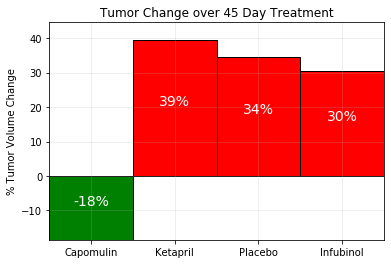

In [26]:
# Referencing http://composition.al/blog/2015/11/29/a-better-way-to-add-labels-to-bar-charts-with-matplotlib/
# This funciton labels each bar (rectangle object) with its height value
def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        
        # Just print the percentage in the center of the bar
        label_position = height/2

        ax.text(rect.get_x() + rect.get_width()/2., label_position,str('%d' % int(height)) + '%',
                ha='center', va='bottom', color = 'w', size = 14)

# Plot the bar chart for percent change
fig, ax = plt.subplots()

x_axis = np.arange(0,4,1)
heights = [vol_change["Capomulin"], vol_change["Ketapril"], vol_change["Placebo"], vol_change["Infubinol"]]
labels = ["Capomulin", "Ketapril", "Placebo", "Infubinol"]
colors = []

# If the change in volume is positive, assign the color red, else green
for vols in heights:
    if vols >= 0:
        colors.append('r')
    else:
        colors.append('g')

barplot = ax.bar(x_axis, heights, width = 1, align='center', color = colors,
                 edgecolor = 'black', linewidth = 1, tick_label = labels)

# Add labeling
ax.set_title("Tumor Change over 45 Day Treatment")
ax.set_ylabel("% Tumor Volume Change")

# Add Gridlines
ax.grid(alpha = 0.25)

# Adjust axis
ax.set_xlim(-.5,3.5)
ax.set_ylim(min(heights), max(heights)+5)

# Add labels for the percentages
autolabel(barplot, ax)

plt.show()

![Metastatic Spread During Treatment](../Images/change.png)